In [3]:
import numpy as np
from matplotlib import pyplot as plt
import jax.numpy as jnp
import jax

In [4]:
import lib

In [ ]:
ns=200 # number of synapses per dendrite
nd=300 # number of dendrites
ndR = 10 # number of updated dendrites at each step
bias = 2.15
bk = 3.50 # bias + kappa
kappa = bk - bias

initial_steps = 10000 # number of steps for initialization
n_tested_patterns = 1000 # the number of tested patterns used for the distribution of memory response
decay_steps = 30000 # after simulation, the age of a tested pattern is at least `decay_steps`

seed = 123456789
rng = np.random.default_rng(seed)

key = jax.random.PRNGKey(rng.integers(100000))
key, subkey = jax.random.split(key)

xs_gen = lib.XsGenerator.XsGen_Normal.XSGen_Normal(nd, ns, -1, seed=rng.integers(100000))

neuron = lib.Neuron.NeuronPerp_Exact.Neuron_Int(ns, nd, ndR)
params = neuron._params_init(bias, kappa, subkey)

simulation_run =  lib.Simulation.Simulation.Simulation_Run(neuron, xs_gen, params, decay_steps, initial_steps, n_tested_patterns, refresh_every=500, seed=rng.integers(100000))

In [6]:
simulation_run.run()

100%|██████████| 31000/31000 [00:14<00:00, 2109.96it/s]


In [7]:
steady_state_length = 10000
upper99_steady1 = jnp.sort(simulation_run.outputs_record[:, decay_steps-steady_state_length:decay_steps].reshape((-1, )))[int(n_tested_patterns*steady_state_length*0.99)]
if upper99_steady1 + 0.00001 < ndR:
    upper99_steady1 += 0.00001
print(upper99_steady1)

mean1 = np.mean(simulation_run.outputs_record, axis=0)[:decay_steps]
lower1 = np.sort(simulation_run.outputs_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps]
upper1 = np.sort(simulation_run.outputs_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps]

4.799354


Text(0, 0.5, 'memory response')

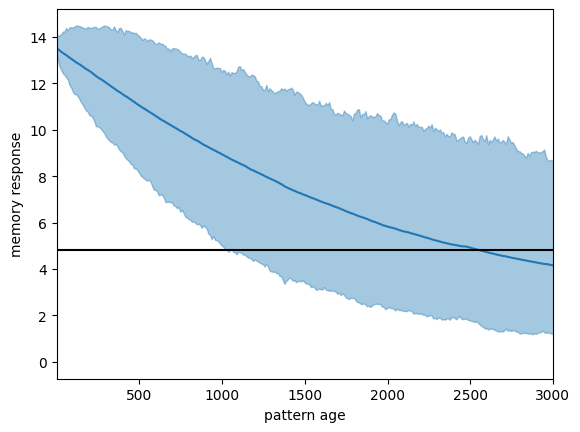

In [16]:
plot_point_spacing = 10

plt.plot(np.arange(0, decay_steps, plot_point_spacing), mean1[::plot_point_spacing], color="C0")
plt.fill_between(np.arange(0, decay_steps, plot_point_spacing), upper1[::plot_point_spacing], lower1[::plot_point_spacing], color="C0", alpha=0.4)
plt.xscale("linear")
xmax = 3000
plt.hlines(upper99_steady1, 0, xmax, colors="black")
plt.xlim(1, xmax)
plt.xlabel("pattern age")
plt.ylabel("memory response")